## Grupo 2: Análisis de reservas y cancelaciones hoteleras: patrones y predicciones
🎯 Objetivo del proyecto
Analizar los datos de reservas de hoteles para comprender el perfil de los clientes, identificar patrones de comportamiento (estacionalidad, duración de la estancia, precios) y estudiar los factores que influyen en las cancelaciones, utilizando herramientas de análisis de datos en Python.

### 1. Introducción y descripción del dataset

- Breve explicación del contexto del análisis

- Descripción de las variables disponibles

- Objetivo del estudio

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('hotel_bookings.csv')

### 2. Perfil general de las reservas

Objetivo: Entender cómo son las reservas y los clientes en general.

Inspeccionamos el dataset

In [7]:
print("--- Primeras 5 filas ---")
print(df.head())

print("\n--- Información general y tipos de datos ---")
df.info()

print("\n--- Resumen estadístico de las columnas numéricas ---")
print(df.describe())

print("\n--- Cuántos datos nulos hay ---")
print(df.isnull().sum())

print("\n--- Cuántos duplicados hay ---")
print(df.duplicated().sum())

--- Primeras 5 filas ---
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ..

In [ ]:
# Llenar valores nulos
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

Analizamos el número de clientes que llegan cada año a los hoteles, diferenciando entre City Hotel y Resort Hotel. ¿Cómo varía la cantidad de clientes a lo largo de los años en cada tipo de hotel?

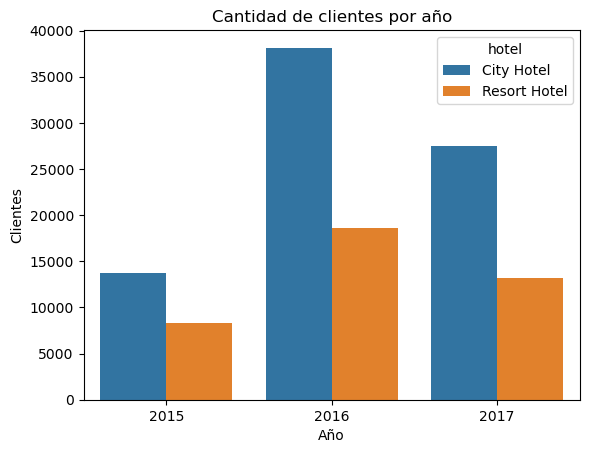

In [51]:
# Contar cuántos clientes hay por año de llegada y por tipo de hotel
clientes_hotel_anio = df.groupby(['arrival_date_year', 'hotel']).size().reset_index(name='cantidad_clientes')

# Crear un gráfico de barras
sns.barplot(data=clientes_hotel_anio, x='arrival_date_year', y='cantidad_clientes', hue='hotel')
plt.title('Cantidad de clientes por año')
plt.xlabel('Año')
plt.ylabel('Clientes')
plt.show()

Analizamos de cuántos países distintos eran los clientes que han hecho reservas en cada tipo de hotel (City Hotel y Resort Hotel)

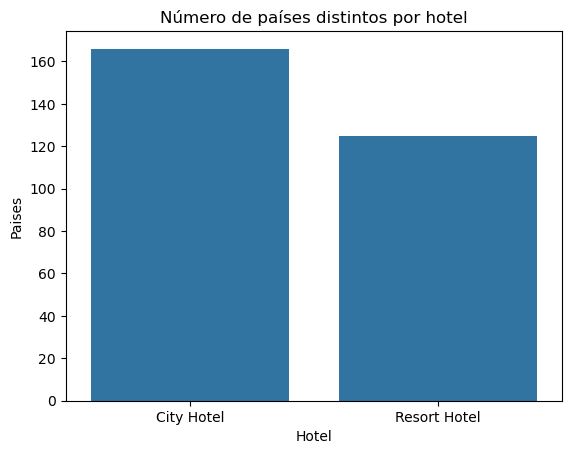

In [52]:
# Contar de cuántos países distintos eran los clientes que han hecho reservas en cada tipo de hotel
num_paises = df.groupby('hotel')['country'].nunique()

sns.barplot(x=num_paises.index, y=num_paises.values)
plt.title('Número de países distintos por hotel')
plt.xlabel('Hotel')
plt.ylabel('Paises')
plt.show()

Analizamos para cada tipo de hotel (City Hotel y Resort Hotel), la cantidad de reservas provenientes de cada país mediante un mapa coroplético mundial. ¿De qué países provienen los clientes de cada hotel y cuáles son los principales mercados de origen?

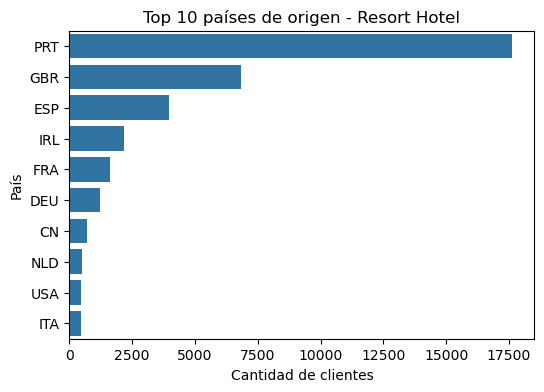

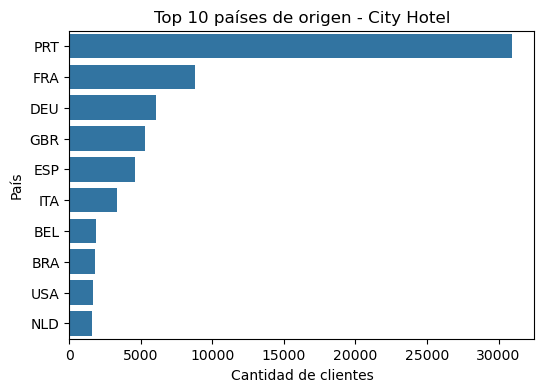

In [ ]:
for hotel in df['hotel'].unique():
    df_hotel = df[df['hotel'] == hotel]
    
    # Contar cuántas reservas hay de cada país en cada hotel y tomar los 10 primeros
    top_10 = df_hotel['country'].value_counts().head(10).reset_index()
    top_10.columns = ['country', 'cantidad_clientes']
    
    # Crear gráfico de barras
    plt.figure(figsize=(6,4))
    sns.barplot(data=top_10, x='cantidad_clientes', y='country')
    plt.title(f'Top 10 países de origen - {hotel}')
    plt.xlabel('Cantidad de clientes')
    plt.ylabel('País')
    plt.show()

In [ ]:
for hotel in df['hotel'].unique():
    # Contar cuántas reservas provienen de cada país en cada hotel
    reservas_hotel = df[df['hotel']==hotel]['country'].value_counts().reset_index()
    reservas_hotel.columns = ['country', 'reservas']
    
    # Crear un mapa coroplético
    fig = px.choropleth(
        reservas_hotel,
        locations='country',
        color='reservas',
        color_continuous_scale='Oranges',
        title=f'Reservas por país - {hotel}'
    )
    fig.show()

Analizamos la distribución de los canales de reserva utilizados por los clientes. ¿Qué canales de reserva utilizan los clientes y cuál es la proporción de cada uno?

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64


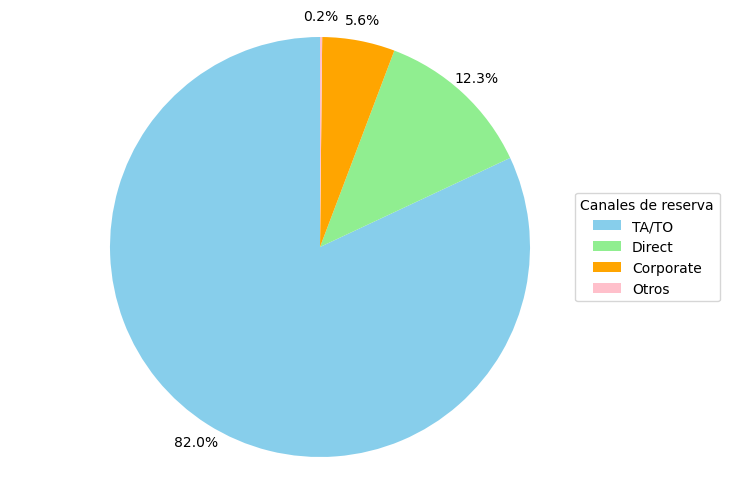

In [48]:
canales = df['distribution_channel'].value_counts()
print(canales)

# Umbral: menos del 5% se agrupa en 'Otros'
umbral = 0.05 * canales.sum()
canales_agrupados = canales.copy()
canales_agrupados[canales < umbral] = 0

otros = canales[canales < umbral].sum()
canales_agrupados = canales_agrupados[canales_agrupados>0]
canales_agrupados['Otros'] = otros

plt.figure(figsize=(8, 6))
# Crear gráfico circular
wedges, texts, autotexts = plt.pie(
    canales_agrupados.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','lightgreen','orange','pink'],
    pctdistance=1.1
)

# Agregar leyenda al lado
plt.legend(
    wedges,
    canales_agrupados.index,
    title="Canales de reserva",
    loc="center left",
    bbox_to_anchor=(0.9, 0, 0.5, 1)
)

plt.axis('equal')
plt.show()

### 3. Patrones de comportamiento y cancelaciones (Rodri)

Objetivo: Analizar cómo varían las reservas en función del tiempo, los precios y la estancia.

Analizamos el número de reservas por mes para determinar la estacionalidad. También analizamos el número de cancelaciones por mes.
¿En qué meses hay más reservas y cancelaciones?

=== RESUMEN COMPLETO (ORDENADO CRONOLÓGICAMENTE) ===
                    Reservas  Porcentaje
arrival_date_month                      
January                 5929        4.97
February                8068        6.76
March                   9794        8.20
April                  11089        9.29
May                    11791        9.88
June                   10939        9.16
July                   12661       10.60
August                 13877       11.62
September              10508        8.80
October                11160        9.35
November                6794        5.69
December                6780        5.68


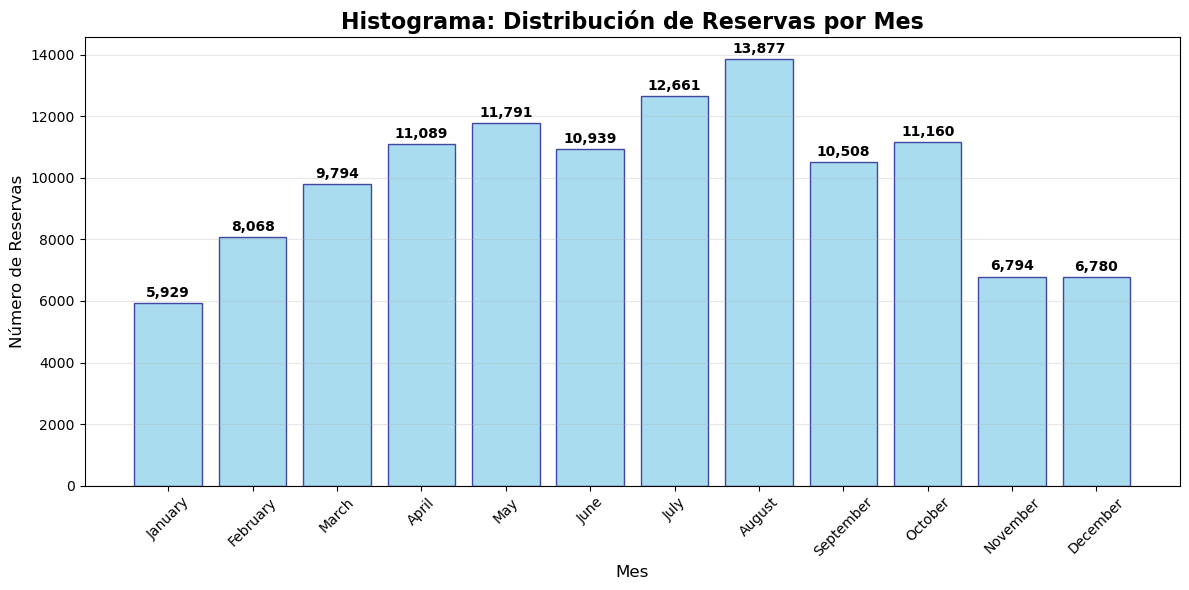

In [27]:
# Análisis de estacionalidad - Porcentaje de clientes por mes

# Contar reservas por mes
reservas_por_mes = df['arrival_date_month'].value_counts()

# Calcular porcentaje por mes
porcentaje_por_mes = (df['arrival_date_month'].value_counts(normalize=True) * 100).round(2)

# Crear una tabla más visual ORDENADA por mes cronológico
resumen_mes = pd.DataFrame({
    'Reservas': reservas_por_mes,
    'Porcentaje': porcentaje_por_mes
})

# Definir el orden correcto de los meses
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Reordenar según el orden cronológico de los meses
resumen_mes = resumen_mes.reindex(orden_meses)

print("=== RESUMEN COMPLETO (ORDENADO CRONOLÓGICAMENTE) ===")
print(resumen_mes)

# Histograma de reservas por mes
plt.figure(figsize=(12, 6))
plt.bar(resumen_mes.index, resumen_mes['Reservas'], color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Histograma: Distribución de Reservas por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(resumen_mes['Reservas']):
    plt.text(i, v + 100, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

=== TASA DE CANCELACIÓN POR MES ===
arrival_date_month
January      30.48
February     33.42
March        32.15
April        40.80
May          39.67
June         41.46
July         37.45
August       37.75
September    39.17
October      38.05
November     31.23
December     34.97
Name: is_canceled, dtype: float64


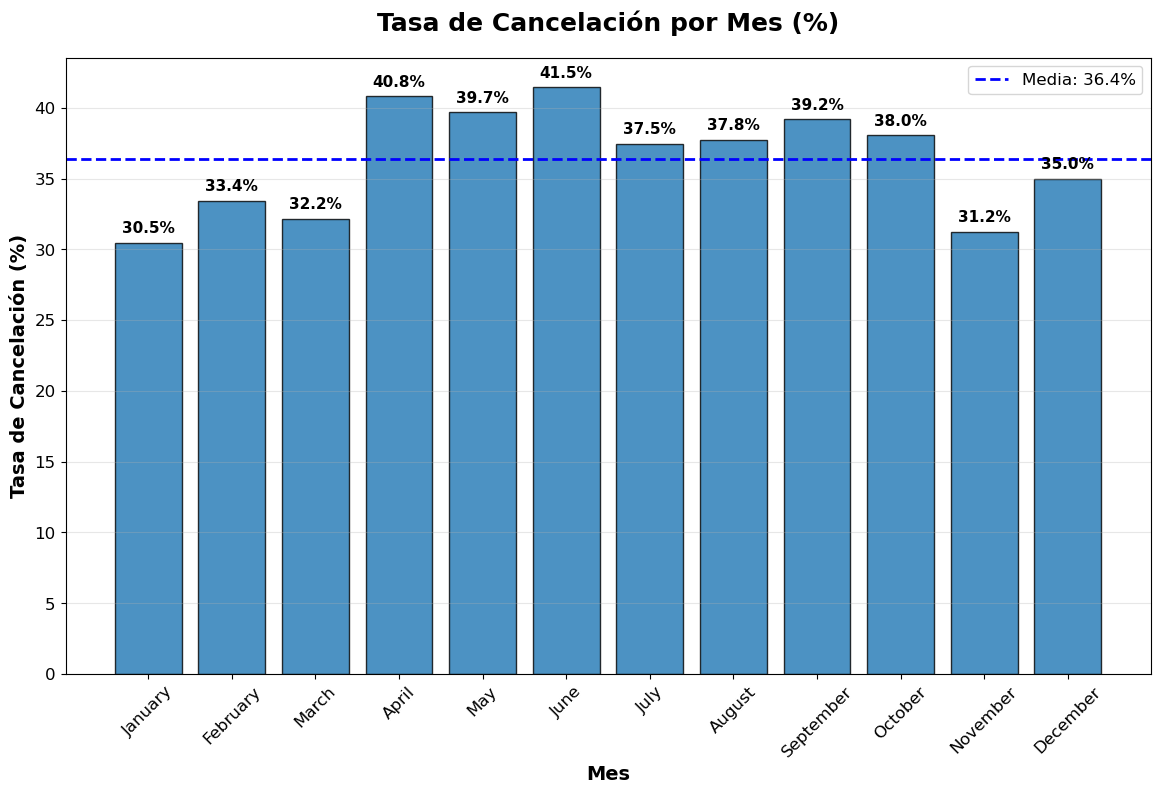

In [28]:
# Calcular tasa de cancelación por mes (cancelaciones/total_reservas_del_mes), calculamos la tasa para que el resultado sea independiente del numero de cancelaciones
print("=== TASA DE CANCELACIÓN POR MES ===")
tasa_cancelacion_mes = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
tasa_cancelacion_ordenada = tasa_cancelacion_mes.reindex(orden_meses)
print(tasa_cancelacion_ordenada.round(2))

# Visualización de la tasa de cancelación por mes
plt.figure(figsize=(14, 8))

bars = plt.bar(tasa_cancelacion_ordenada.index, tasa_cancelacion_ordenada.values, edgecolor='black', alpha=0.8)

plt.title('Tasa de Cancelación por Mes (%)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Mes', fontsize=14, fontweight='bold')
plt.ylabel('Tasa de Cancelación (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Añadir valores en las barras
for i, (mes, tasa) in enumerate(tasa_cancelacion_ordenada.items()):
    plt.text(i, tasa + 0.5, f'{tasa:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

# Añadir línea de referencia con la media
media_cancelacion = tasa_cancelacion_ordenada.mean()
plt.axhline(y=media_cancelacion, color='blue', linestyle='--', linewidth=2, 
            label=f'Media: {media_cancelacion:.1f}%')

# Añadir rejilla y leyenda
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=12)
plt.show()

Analisis de la variacion del precio con los meses

=== ESTADÍSTICAS DE PRECIOS POR TEMPORADA ===

Primavera:
  Precio promedio: $97.48

Verano:
  Precio promedio: $128.77

Otoño:
  Precio promedio: $90.87

Invierno:
  Precio promedio: $75.11


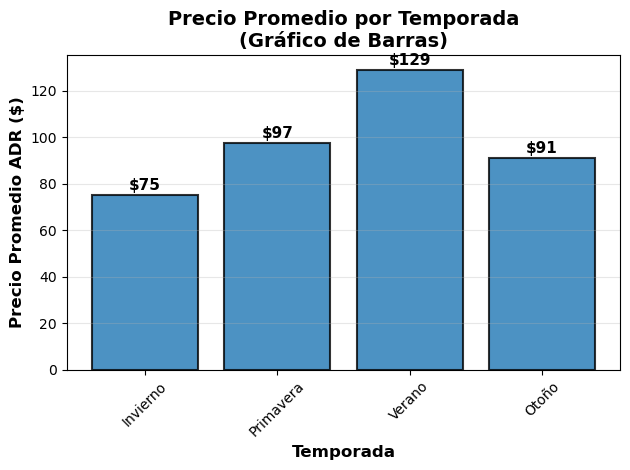


=== RANKING DE TEMPORADAS POR PRECIO PROMEDIO ===
1. Verano: $128.77
2. Primavera: $97.48
3. Otoño: $90.87
4. Invierno: $75.11


In [29]:
# Boxplot: Variación de precios según temporada

# Definir temporadas basándose en los meses
def categorizar_temporada(mes):
    if mes in ['December', 'January', 'February']:
        return 'Invierno'
    elif mes in ['March', 'April', 'May']:
        return 'Primavera'
    elif mes in ['June', 'July', 'August']:
        return 'Verano'
    else: 
        return 'Otoño'

# Crear columna de temporada
df['temporada'] = df['arrival_date_month'].apply(categorizar_temporada)

temporadas_ordenadas = ['Invierno', 'Primavera', 'Verano', 'Otoño']
datos_temporadas = [df[df['temporada'] == temp]['adr'] for temp in temporadas_ordenadas]

# Gráfico de barras con precio promedio
precio_promedio_temp = df.groupby('temporada')['adr'].mean().reindex(temporadas_ordenadas)
barras = plt.bar(temporadas_ordenadas, precio_promedio_temp.values, alpha=0.8 ,edgecolor='black', linewidth=1.5)

# Añadir valores en las barras
for bar, valor in zip(barras, precio_promedio_temp.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'${valor:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('Precio Promedio por Temporada\n(Gráfico de Barras)', fontsize=14, fontweight='bold')
plt.xlabel('Temporada', fontsize=12, fontweight='bold')
plt.ylabel('Precio Promedio ADR ($)', fontsize=12, fontweight='bold')
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()

# Añadir estadísticas por temporada
print("=== ESTADÍSTICAS DE PRECIOS POR TEMPORADA ===")
for temp in ['Primavera', 'Verano', 'Otoño', 'Invierno']:
    precios_temp = df[df['temporada'] == temp]['adr']
    print(f"\n{temp}:")
    print(f"  Precio promedio: ${precios_temp.mean():.2f}")

plt.show()

# Análisis adicional: precio promedio por temporada
precio_por_temporada = df.groupby('temporada')['adr'].mean().sort_values(ascending=False)
print(f"\n=== RANKING DE TEMPORADAS POR PRECIO PROMEDIO ===")
for i, (temp, precio) in enumerate(precio_por_temporada.items(), 1):
    print(f"{i}. {temp}: ${precio:.2f}")

Analisis de la correlacion entre el precio y la tasa de cancelacion ¿El precio influye en la probabilidad de cancelación?

In [30]:
# ¿El precio influye en la probabilidad de cancelación?

print("=== ANÁLISIS: PRECIO vs CANCELACIÓN ===")

# 1. Estadísticas básicas del precio (ADR - Average Daily Rate)
print("1. ESTADÍSTICAS BÁSICAS DEL PRECIO")

print(f"Precio promedio general: ${df['adr'].mean():.2f}")
print(f"Precio mediano: ${df['adr'].median():.2f}")

# 2. Comparar precios entre reservas canceladas vs no canceladas
precio_canceladas = df[df['is_canceled'] == 1]['adr']
precio_no_canceladas = df[df['is_canceled'] == 0]['adr']

print(f"\nPrecio promedio - Reservas CANCELADAS: ${precio_canceladas.mean():.2f}")
print(f"Precio promedio - Reservas NO canceladas: ${precio_no_canceladas.mean():.2f}")
print(f"Diferencia: ${precio_canceladas.mean() - precio_no_canceladas.mean():.2f}")

# 4. Correlación entre precio y cancelación
print("\n" + "="*50)
print("2. CORRELACIÓN PRECIO-CANCELACIÓN")
correlacion = df['adr'].corr(df['is_canceled'])
print(f"Correlación entre precio (ADR) y cancelación: {correlacion:.4f}")

=== ANÁLISIS: PRECIO vs CANCELACIÓN ===
1. ESTADÍSTICAS BÁSICAS DEL PRECIO
Precio promedio general: $101.83
Precio mediano: $94.58

Precio promedio - Reservas CANCELADAS: $104.96
Precio promedio - Reservas NO canceladas: $99.99
Diferencia: $4.98

2. CORRELACIÓN PRECIO-CANCELACIÓN
Correlación entre precio (ADR) y cancelación: 0.0476


¿Las cancelaciones varían por tipo de hotel?

In [31]:
# Calcular cancelaciones por tipo de hotel
print("CANCELACIONES POR TIPO DE HOTEL")

# Cancelaciones absolutas por tipo
cancelaciones_por_tipo = df[df['is_canceled'] == 1]['hotel'].value_counts()
print("Número de cancelaciones por tipo:")
print(cancelaciones_por_tipo)

#  TASA DE CANCELACIÓN por tipo (lo más importante)
print("TASA DE CANCELACIÓN POR TIPO (cancelaciones/total_reservas)")

tasa_por_tipo = df.groupby('hotel').agg({
    'is_canceled': ['count', 'sum', 'mean']
}).round(4)

# Simplificar nombres de columnas
tasa_por_tipo.columns = ['Total_Reservas', 'Total_Cancelaciones', 'Tasa_Cancelacion']
tasa_por_tipo['Tasa_Cancelacion_Pct'] = (tasa_por_tipo['Tasa_Cancelacion'] * 100).round(2)

print(tasa_por_tipo)

print("\n" + "="*60)

# 4. Interpretación y comparación
print("4. INTERPRETACIÓN")
city_hotel_rate = tasa_por_tipo.loc['City Hotel', 'Tasa_Cancelacion_Pct']
resort_hotel_rate = tasa_por_tipo.loc['Resort Hotel', 'Tasa_Cancelacion_Pct']

diferencia = abs(city_hotel_rate - resort_hotel_rate)
print(f"City Hotel - Tasa de cancelación: {city_hotel_rate}%")
print(f"Resort Hotel - Tasa de cancelación: {resort_hotel_rate}%")
print(f"Diferencia: {diferencia:.2f} puntos porcentuales")

if city_hotel_rate > resort_hotel_rate:
    print(f"→ Los CITY HOTELS tienen {diferencia:.2f}% MÁS cancelaciones que los Resort Hotels")
elif resort_hotel_rate > city_hotel_rate:
    print(f"→ Los RESORT HOTELS tienen {diferencia:.2f}% MÁS cancelaciones que los City Hotels")
else:
    print("→ Ambos tipos de hotel tienen tasas de cancelación similares")

CANCELACIONES POR TIPO DE HOTEL
Número de cancelaciones por tipo:
hotel
City Hotel      33102
Resort Hotel    11122
Name: count, dtype: int64
TASA DE CANCELACIÓN POR TIPO (cancelaciones/total_reservas)
              Total_Reservas  Total_Cancelaciones  Tasa_Cancelacion  \
hotel                                                                 
City Hotel             79330                33102            0.4173   
Resort Hotel           40060                11122            0.2776   

              Tasa_Cancelacion_Pct  
hotel                               
City Hotel                   41.73  
Resort Hotel                 27.76  

4. INTERPRETACIÓN
City Hotel - Tasa de cancelación: 41.73%
Resort Hotel - Tasa de cancelación: 27.76%
Diferencia: 13.97 puntos porcentuales
→ Los CITY HOTELS tienen 13.97% MÁS cancelaciones que los Resort Hotels


### 4. Predicción y recomendaciones

Objetivo: Explorar qué factores están más relacionados con las cancelaciones y proponer conclusiones prácticas.

### 5. Conclusiones

- Principales hallazgos

- Reflexiones sobre el comportamiento de los usuarios

- Posibles recomendaciones para retención